# Basit Doğrusal Regresyon

In [1]:
import numpy as np

In [2]:
?np

Type:        module
String form: <module 'numpy' from 'C:\\Users\\mkaraca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\numpy\\__init__.py'>
File:        c:\users\mkaraca\appdata\local\programs\python\python310\lib\site-packages\numpy\__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code sn

In [3]:
who

np	 


In [4]:
import pandas as pd
ad=pd.read_csv("advertising.csv")
df=ad.copy()

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [7]:
 df.isnull().values.any() #Eksik veri var mı yok mu?

False

In [8]:
df.corr() #korelasyon

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


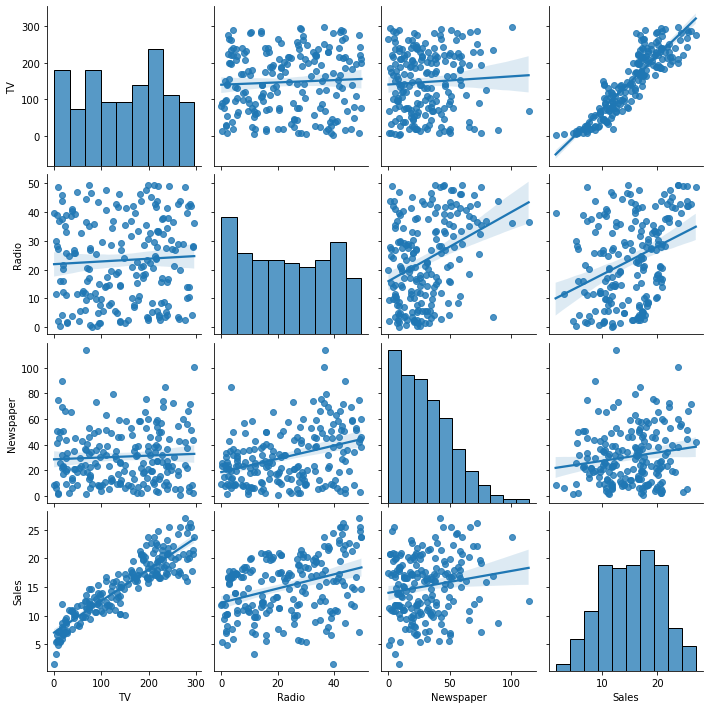

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,kind="reg")#korelasyon ayrıntılı inceleme

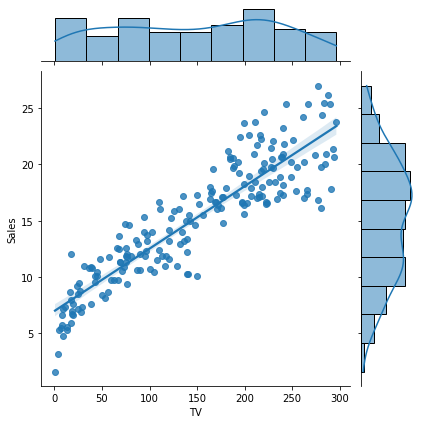

In [10]:
sns.jointplot(x="TV",y="Sales",data=df,kind="reg")

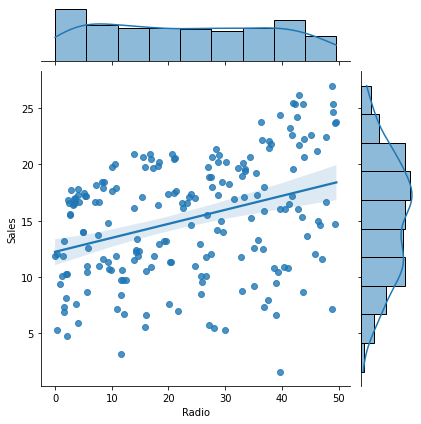

In [11]:
sns.jointplot(x="Radio",y="Sales",data=df,kind="reg")

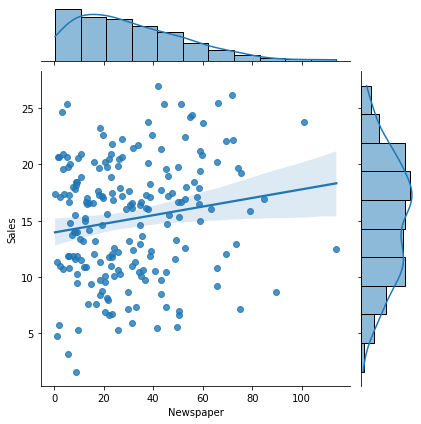

In [12]:
sns.jointplot(x="Newspaper",y="Sales",data=df,kind="reg")

## Statsmodels ile modelleme

In [13]:
import statsmodels.api as sm

In [14]:
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
X=sm.add_constant(X)

In [16]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
Y=df["Sales"]
Y[0:5]

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [18]:
lm=sm.OLS(Y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           7.93e-74
Time:                        17:39:33   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import statsmodels.formula.api as smf
lm=smf.ols("Sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           7.93e-74
Time:                        17:39:34   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [21]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.9748,0.323,21.624,0.000,6.339,7.611
TV,0.0555,0.002,29.260,0.000,0.052,0.059


In [22]:
model.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [23]:
print("f_pvalue: ","%0.3f"%model.f_pvalue)

f_pvalue:  0.000


In [24]:
print("fvalue: ","%0.2f"%model.fvalue)

fvalue:  856.18


In [25]:
print("tvalue: ","%0.2f"%model.tvalues[0:1])

tvalue:  21.62


In [26]:
model.mse_model

4512.435170440974

In [27]:
model.rsquared

0.8121757029987414

In [28]:
model.rsquared_adj

0.811227095438129

In [29]:
model.fittedvalues[0:5]

0    19.737265
1     9.443004
2     7.928816
3    15.377734
4    17.002852
dtype: float64

In [30]:
Y[0:5]

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

C:\Users\mkaraca\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


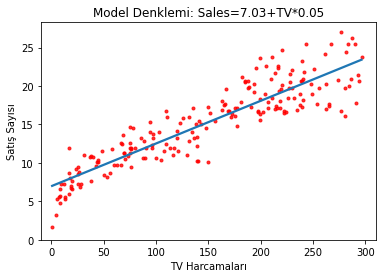

In [31]:
g=sns.regplot(df["TV"],df["Sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X=df[["TV"]]
Y=df["Sales"]
reg=LinearRegression()
model=reg.fit(X,Y)
model.intercept_
model.coef_

array([0.05546477])

In [34]:
model.score(X,Y)

0.8121757029987414

In [35]:
model.predict(X)[0:10]

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263])